# Generating Code with AI: A Practical Guide for Domain Experts

## What you'll learn

- **Foundational Knowledge** 
    - How AI coding models are trained
    - what this means for their capabilities and limitations.  
    - Interpret semantic versioning and assess AI code compatibility across versions.  
    - Compare strengths and weaknesses of current AI models and choose appropriate tools for domain-specific tasks.  
    - Evaluate benchmark scores to understand model performance.  

- **Prompt Engineering Skills**
    - Craft effective prompts
    - Translate business requirements into precise technical specifications
    - Identify and correct common prompting errors

- **Code Evaluation & Verification**
    - Recognize and test for hallucinations
    - Apply structured review and testing procedures
    - Construct and use test cases

- **Critical Awareness & Safe Practice**
    - Detect and mitigate hidden pitfalls
    - Adopt safe, iterative practices


## Understanding the Process: From Your Ideas to Working Code

When you use AI to generate code, you're engaging in a sophisticated translation process. The AI takes your natural language description of what you want to accomplish and converts it into executable code. Understanding how this process works—and more importantly, how to make it work well for you—is the key to successfully building applications with AI assistance.

At the heart of this process lies prompt engineering, the skill of crafting instructions that effectively communicate your requirements to the AI. The quality of your prompts directly determines the quality of the generated code. A vague prompt like "analyze my data" produces generic, often unusable code, while a well-stated prompt yields immediately applicable solutions. Mastering prompt engineering transforms AI from a hit-or-miss tool into a reliable development partner.

This chapter provides you with concrete, actionable knowledge about how AI coding tools work, which ones to choose for your needs, how to engineer effective prompts that get the results you want, and most critically, how to avoid the common mistakes that can derail your projects. By the end, you'll understand not just the theory but the practical steps you need to take to generate reliable, useful code with AI.

## Part 1: How AI Models Learn to Generate Code

### The Training Process Explained

Modern AI coding models like GPT-4, Claude, and Gemini learned to generate code by analyzing millions of code examples from public repositories. Think of this process like how you might learn a new skill by watching thousands of experts perform it—eventually, you start to recognize patterns and understand what techniques work in which situations.

The training happens in three distinct phases, each serving a specific purpose. 1. Pattern recognition, or pretraining, where the AI reads enormous amounts of code—billions of lines from GitHub, Stack Overflow, technical documentation, and programming forums. During this phase, it learns basic patterns: how Python functions are structured, what makes valid JavaScript syntax, how SQL queries are formatted. It's like a medical student memorizing anatomy before learning to diagnose patients.

The second phase focuses on following instructions through supervised fine-tuning. Here, the AI learns from high-quality examples of programmers solving specific problems. It studies thousands of cases where someone asked "How do I sort a list?" or "Create a function to calculate compound interest" along with the correct solutions. This teaches the AI to understand what people actually want when they make requests.

Finally, there's the alignment phase using reinforcement learning from human feedback (RLHF). Human reviewers rate the AI's code generation attempts as helpful or unhelpful, teaching it to produce code that people actually find useful. This is like an apprentice getting feedback from a master craftsperson—learning not just what's technically correct but what's practically valuable.

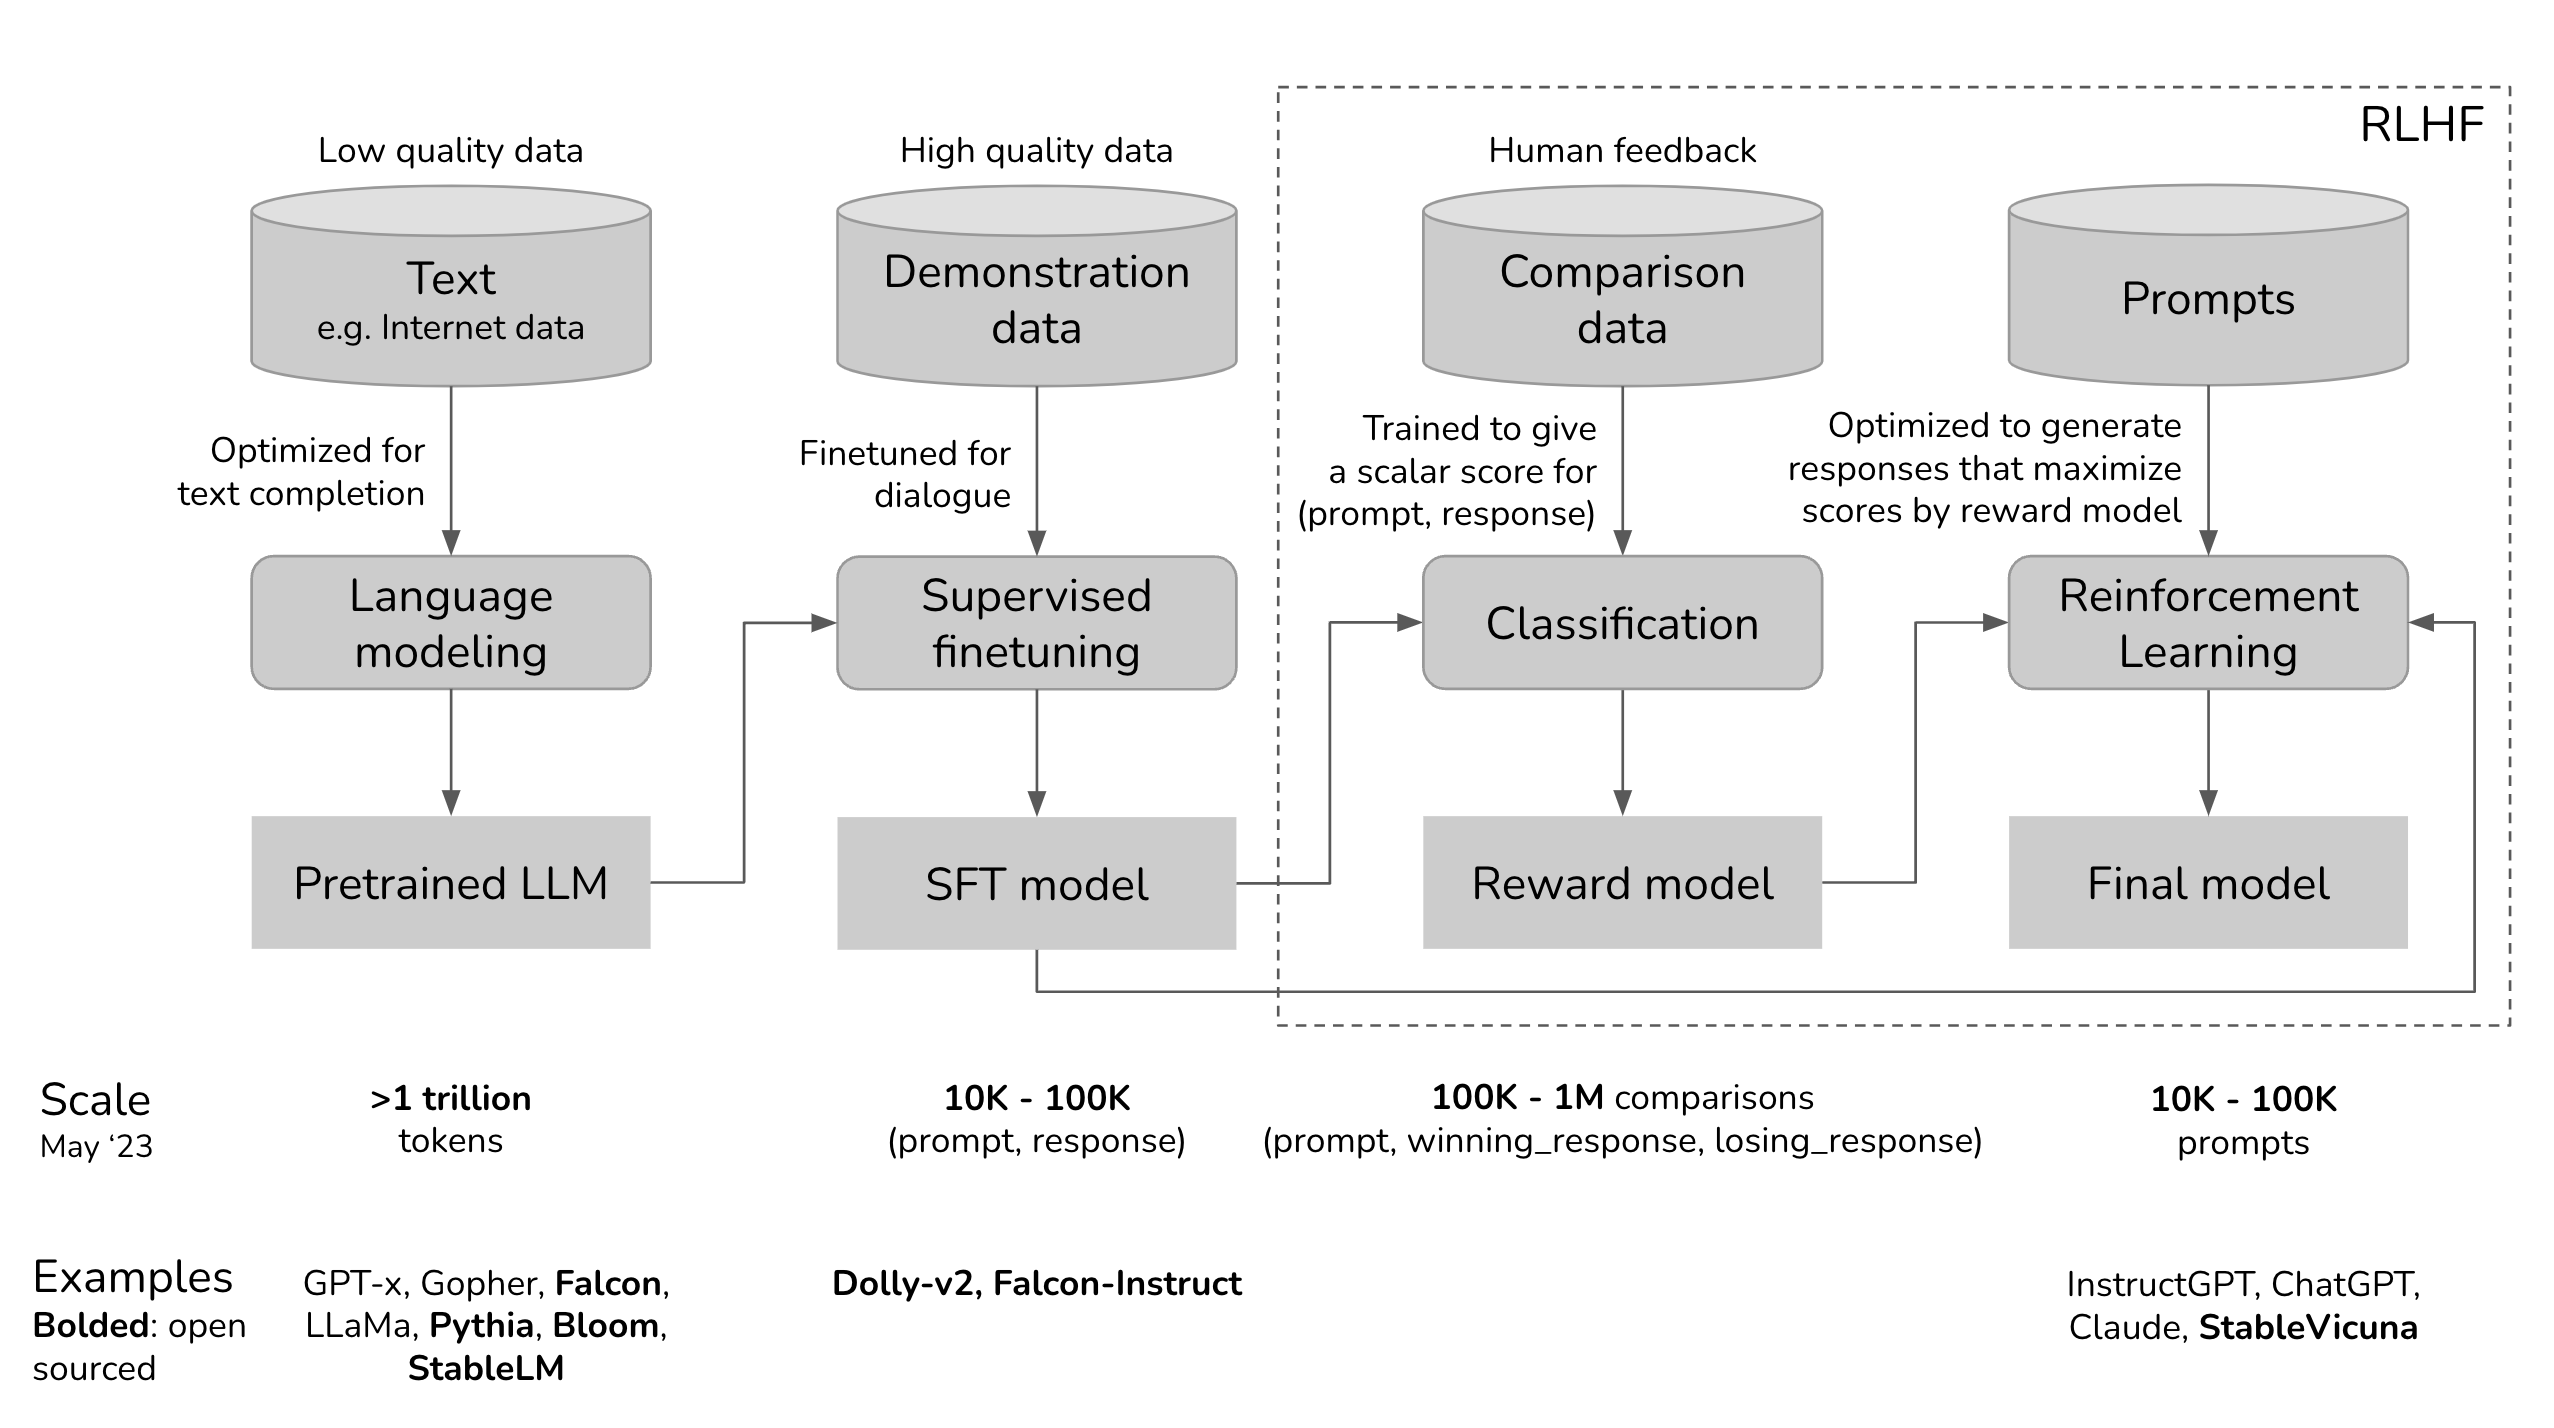

*Figure 1 – Illustration of the three phases of ChatGPT-style model training: pretraining on indiscriminate data (unrefined model), supervised fine-tuning on high-quality datasets (shaping it into a helpful assistant), and reinforcement learning from human feedback to align behavior with user preferences. Source: https://huyenchip.com/*

### What This Means for Your Work

Understanding this training process reveals both capabilities and limitations that directly impact your work. The AI excels at common patterns because it has seen millions of examples. If you're building a web application, analyzing data with pandas (popular python library covered in ICS 604), or creating visualizations with matplotlib (also covered in ICS 604), your code will likely be of good quality because it follows well-established patterns that appear frequently in the training data.

However, the AI struggles with unusual combinations. If you're using a specialized library that few people use, or combining tools in novel ways, the AI has fewer examples to draw from. You'll need to provide more guidance and review the output more carefully. Additionally, the AI's knowledge has a cutoff date. Models are trained on code up to a specific date, so they won't know about library updates, new frameworks, or changed best practices from after that date.

Unfortunately, there is no sure way of checking whether your tools are well-represented in the AI's training other checking the tool's cutoff date to make sure the library is older than the cutoff date and using trial and error on simple use cases to make sure the model can handle them. 

You can ask the model for its knowledge cutoff date and make sure that you are working with a version that was released before the cutoff date suing a prompt similar to the following.

```
What is your knowledge cutoff date?
```
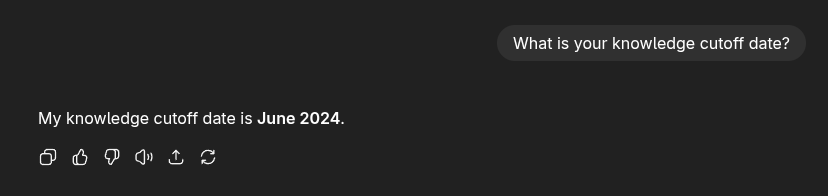

*Figure 2 - ChatGPT 5 knowledge cutoff date. Source: https://chatgpt.com*

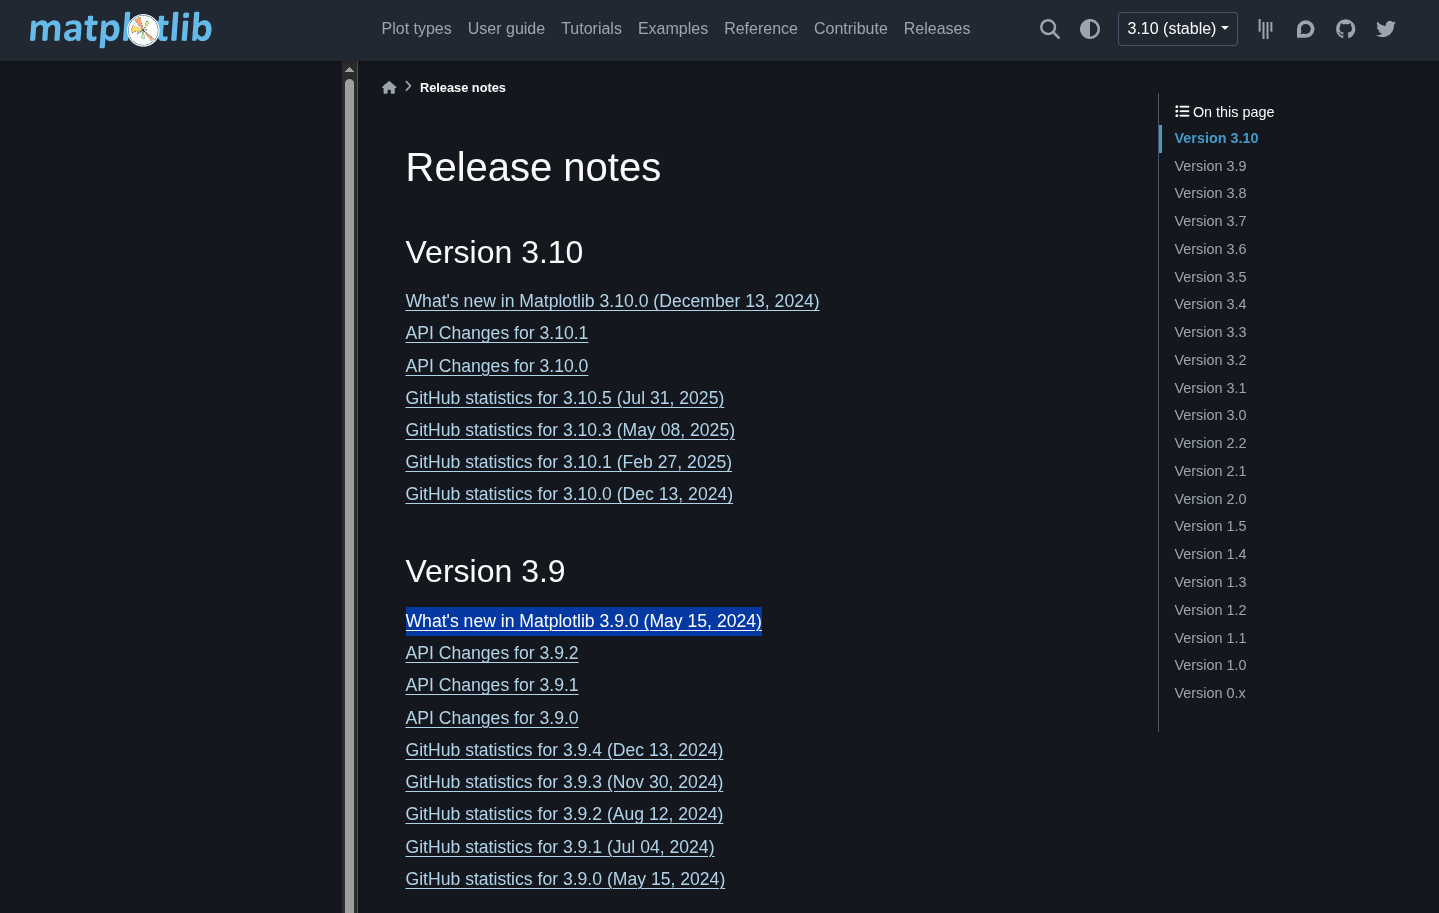

*Figure 3 - Matplotlib release notes and version history. Source: https://matplotlib.org/stable/users/release_notes.html*


Here's a quick way to ask the model to generate code in `matplotlib` for a simple use case so you can inspect the depth and breadth of of it's understandin of the libary.

```python
Can you provide 3, self-contained examples of how to create a basic histogram plot using matplotlib 3.9.
```

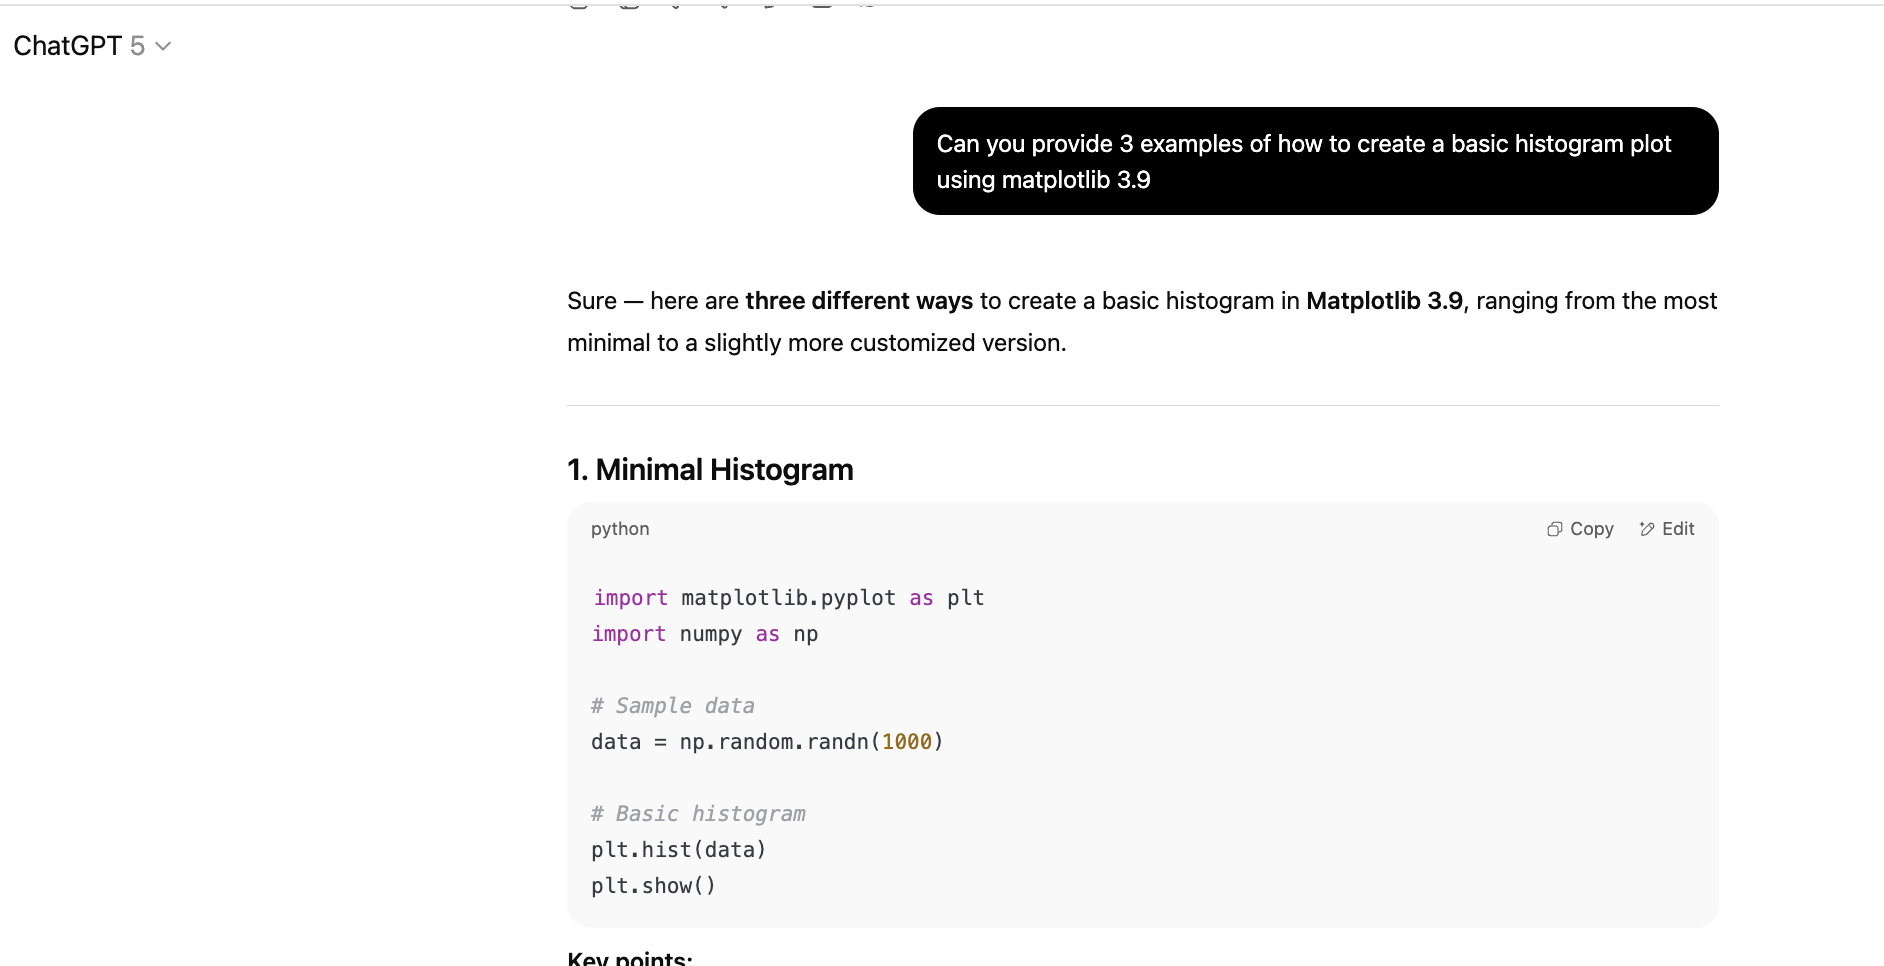
Partial output of the prompt

- One needs to check the provided code to make sure it was not "Hallicinated"

## Understanding Hallucinations in AI-Generated Code

In AI-generated code, "hallucinations" occur when the model creates code (functions, methods,  parameters, etc.) that don't actually exist but appear plausible. The AI generates these fictitious elements because it learned patterns from millions of code examples and tries to produce what seems most likely, even when it doesn't exist in reality.

For example, when asked to analyze data with pandas, the AI might generate:
```python
df.smart_segment_customers()  # This method doesn't exist in pandas
```

This looks reasonable and follows pandas naming conventions, but there's no such method. The AI hallucinated it because it seems like something that should exist.

#### Why This Happens

AI models generate code by predicting what should come next based on patterns they've learned, not by consulting actual documentation or verifying that functions exist. When the model encounters a request for functionality it hasn't seen exactly before, it may synthesize plausible-looking solutions that don't correspond to real functions or methods.

#### Common Types of Hallucinations

The most frequent hallucinations include invented methods that sound logical but don't exist, like `calculate_average_by_group()` when the actual method is `groupby().mean()`. The AI might also add non-existent parameters to real functions, such as adding a `normalize=True` parameter to a function that doesn't support it. In extreme cases, it might even suggest importing entire libraries that don't exist.

Hallucinated code often looks perfectly correct and professional. It follows proper syntax, uses appropriate variable names, and implements logical workflows. Only when you actually run the code will you discover that the functions don't exist. This makes testing every piece of generated code absolutely critical—not because AI is unreliable, but because hallucinations are an inherent limitation of how these models work.

The solution is straightforward: always run generated code in your actual environment before relying on it. When you encounter an unfamiliar function that seems too convenient, verify it exists in the official documentation. If the code fails with an `AttributeError` or `ImportError`, you've likely encountered a hallucination and need to ask the AI for an alternative approach using documented functions.

In [5]:
# Hallucination example: Non-existent method on built-in Python list
# While LLMs rarely make this specific error with basic Python,
# this demonstrates the AttributeError you'll encounter with hallucinated methods

numbers = [1, 2, 3, 4]
total = numbers.sum()  # AttributeError: 'list' object has no attribute 'sum'

AttributeError: 'list' object has no attribute 'sum'

In [3]:
sum(some_list)

10

# Understanding Software Versions and AI Compatibility

## What Is Semantic Versioning?

When you work with AI to generate code, you'll often need to specify which version of a library or tool you're using. You might see version numbers like 3.4.1, 2.0.0, or 1.12.5 and wonder what these numbers mean and why they matter. These aren't random—they follow a system called `semantic versioning` that communicates important information about compatibility and changes.

Semantic versioning is a standardized way of numbering software releases that helps developers understand what changed between versions and whether those changes might break existing code. This system is used by virtually all modern programming libraries and tools, from Python packages like pandas and matplotlib to JavaScript web frameworks.

## The Three-Number System

Semantic versioning uses three numbers separated by dots: **MAJOR.MINOR.PATCH**

For example, in version 3.4.1:
- **3** is the MAJOR version
- **4** is the MINOR version  
- **1** is the PATCH version

Each position has a specific meaning that tells you about the nature of changes in that release.

### MAJOR Version (First Number)

The MAJOR version increases when there are incompatible changes that might break existing code. This is like renovating a house and changing the location of doors—anyone who memorized the old layout will need to relearn where things are.

For example, when a library moves from version 2.9.8 to 3.0.0, it signals breaking changes. Code written for version 2 might not work with version 3 without modifications. The changes might be minor, e.g., 99% of the code remains the same, yet, the devlopers needs to know that the library might have removed functions, changed how existing functions work, or reorganized its structure entirely.

Real-world example: When pandas moved from version 1.x to 2.0, it removed several deprecated functions and changed how certain data types were handled. Code that worked perfectly with pandas 1.5 might produce errors with pandas 2.0.

### MINOR Version (Middle Number)

The MINOR version increases when new features are added in a backward-compatible way. This is like adding new rooms to a house without changing any existing rooms—everything that worked before still works, but now you have additional options.

Moving from version 3.4.0 to 3.5.0 means new capabilities were added, but all your existing 3.4 code should continue working without any changes. The library gained new functions or parameters, but didn't break anything that already existed.

Real-world example: When matplotlib went from 3.4 to 3.5, it added new plotting styles and customization options. Any plots you created with 3.4 would still work exactly the same in 3.5, but you'd have access to additional features if you wanted them.

### PATCH Version (Last Number)

The PATCH version increases for backward-compatible bug fixes. This is like fixing a squeaky door or patching a leaky roof—nothing about how you use the house changes, but problems are resolved.

Going from version 3.4.1 to 3.4.2 means bugs were fixed but no features were added or changed. Your code should work exactly the same, just more reliably.

Real-world example: A patch update might fix a bug where a function incorrectly handled missing data in certain edge cases. The function's behavior for normal cases remains identical.

## Why This Matters for AI-Generated Code

Understanding semantic versioning is crucial when working with AI coding assistants because it helps you understand what the AI can and cannot do with different library versions.

### Compatibility Within Minor Versions

If an AI model was trained on matplotlib version 3.4.1, it should handle any 3.4.x version perfectly well. Version 3.4.2, 3.4.3, or even 3.4.15 are just bug fixes to the same core version the AI knows. The functions, parameters, and usage patterns remain the same.

### Compatibility Across Minor Versions

The AI will probably work reasonably well with nearby minor versions. If trained on version 3.4, it can likely generate good code for version 3.5 or 3.6. The core concepts and most functions remain the same. However, the AI won't know about new features added in those versions. If version 3.6 introduced a new plotting function, the AI trained on 3.4 won't suggest using it.

### Challenges with Major Version Changes

Major version changes can cause issues, depending on the scale of the change. If the AI was trained on version 2.x of a library, it might generate code that doesn't work with version 3.x. Functions might have been renamed, removed, or might work differently. Parameters that were optional might now be required, or the entire philosophy of how to use the library might have changed.

## Part 2: Choosing the Right AI Model

### Current Landscape of Code-Generating AI Models

As of August 2025, the most commonly used AI models for code generation include GPT-5 (released just a week ago at the time of this writing), Claude 4, Gemini, and GitHub Copilot. Each model has distinct strengths, and the landscape is rapidly evolving with new releases and improvements.

Based on widespread feedback from the developer community (and personal experience), Claude currently produces the most reliable and well-explained code, particularly for complex tasks requiring careful reasoning. GPT-5, despite being fairly new, shows impressive early results and may prove to be a strong competitor as more developers gain experience with it. However, it's important to note that these assessments are subjective and vary significantly based on specific use cases and are constantly changing.


A critical factor that many beginners overlook is that the paid "Pro" or "Plus" versions of these models generate substantially better results than their free counterparts. The difference isn't marginal—paid versions often produce more complete, better-structured, and more reliable code.  Investing in at least one paid subscription will dramatically improve your experience and productivity.


### Model Specializations

While general capabilities matter, certain models excel in specific domains due to their training data and optimizations. Gemini, for instance, has superior knowledge of Google's APIs and ecosystem. If you're building applications using Google Cloud Platform, Firebase, or other Google services, Gemini often provides more accurate and idiomatic code. IBM's Watson Code Assistant, while less commonly discussed, excels at enterprise frameworks and languages like COBOL and Java, making it valuable for corporate environments working with legacy systems.

These specializations emerge from the training data each company prioritizes. Google naturally ensures Gemini understands its own documentation thoroughly, while IBM focuses on the enterprise technologies its customers use. Understanding these strengths helps you choose the right tool for your specific project.

### Understanding Benchmarks

Rather than relying solely on marketing claims or anecdotal experiences, standardized benchmarks provide objective measures of model performance on coding tasks. These benchmarks test specific capabilities under controlled conditions, offering quantitative comparisons between models.

The two most widely cited benchmarks for code generation are:

**HumanEval** measures basic Python programming competency through 164 function-writing problems. Each problem provides a function signature and docstring, and the model must generate code that passes predefined test cases. Problems range from simple string manipulation to implementing algorithms like finding prime numbers. A model scoring 85% on HumanEval successfully solved about 139 of these problems. Current top models achieve scores between 80-90%, with Claude 3 Opus at 84.9% and GPT-4 at 84.1%.

**SWE-bench** represents a more realistic evaluation, requiring models to resolve actual GitHub issues from popular open-source projects. Instead of writing isolated functions, models must understand existing codebases, identify problems, and generate patches that fix bugs while passing existing tests. This benchmark better reflects real-world software development, where understanding context and working with existing code is crucial. Performance on SWE-bench is much lower than HumanEval, with top models resolving only 12-20% of issues, highlighting the difficulty of real-world software engineering tasks.

| Benchmark | What It Tests              | Real-World Relevance                |
|-----------|----------------------------|-------------------------------------|
| HumanEval | Basic Python functions     | Good for fundamental skills         |   
| SWE-bench | Bug fixing in real repos   | Excellent for practical development |   
| MBPP      | Python problem diversity   | Broader than HumanEval              |   
| APPS      | Competition-style problems | Complex algorithmic thinking        |   

<br/>

| Benchmark                  | Claude 4 Opus | Claude 4 Sonnet | GPT-4o    | Gemini 2.5 Pro |
|----------------------------|---------------|-----------------|-----------|----------------|
| HumanEval (Code Gen)       | Not Available | Not Available   | 74.8%     | **75.6%**      |
| GPQA (Graduate Reasoning)  | 83.3%         | **83.8%**       | 83.3%     | 83.0%          |
| MMLU (World Knowledge)     | **88.8%**     | 86.5%           | 88.7%     | 88.6%          |
| AIME 2025 (Math)           | **90.0%**     | 85.0%           | 88.9%     | 83.0%          |
| SWE-bench (Agentic Coding) | **72.5%**     | 72.7%           | 69.1%     | 63.2%          |
| TAU-bench (Tool Use)       | **81.4%**     | 80.5%           | 70.4%     | Not Available  |
| Terminal-bench (Coding)    | **43.2%**     | 35.5%           | 30.2%     | 25.3%          |
| MMMU (Visual Reasoning)    | 76.5%         | 74.4%           | **82.9%** | 79.6%          |

*Recent benchmark scores for popular AI coding models. Source: https://www.analyticsvidhya.com/blog/2025/05/best-ai-for-coding/*

### Interpreting Benchmark Scores

When evaluating models, understand that high HumanEval scores (>80%) indicate solid fundamental programming abilities, while SWE-bench scores show real-world effectiveness. A model might excel at HumanEval but struggle with SWE-bench, suggesting it's good at creating new code but weak at understanding existing systems.

For domain experts, HumanEval scores above 75% indicate sufficient capability for most routine coding tasks. However, if your work involves modifying existing code or working with complex systems, pay closer attention to SWE-bench performance. 

The key insight is that benchmark scores provide useful guidance but shouldn't be your only consideration. A model that scores slightly lower on benchmarks but specializes in your domain or integrates better with your workflow might be the better choice for your specific needs.

### Making Your Selection

To choose the right model, consider your primary use case and constraints. If you're building a complex application with multiple components, GPT-4 or the new GPT-5's superior reasoning may justify their cost. If you're learning and need thorough explanations, Claude's teaching ability makes it ideal. For quick experiments and prototypes, Gemini's speed and lower cost work well. And if you're doing production coding in an IDE, Copilot's integration is unmatched.


## Part 3: Writing Prompts That Generate Useful Code

### The Anatomy of an Effective Prompt

Writing effective prompts is the most critical skill for AI-assisted coding. A well-crafted prompt functions as a detailed specification that provides the AI with all necessary information to generate appropriate code. Poor prompts result in generic, unreliable code requiring extensive revision.

An effective prompt contains several essential elements working in concert. First, the technical context must specify the programming language, version, and available libraries. Second, the prompt must include sufficient detail that someone unfamiliar with the project could understand the requirements. This includes data structure information, expected inputs and outputs, constraints, and requirements. Finally, the prompt should specify the desired output format and any coding standards to follow.

The following examples illustrate the difference between weak and strong prompts for analyzing customer data to identify valuable segments.

**Weak prompt:**

```
"Write code to analyze customer data"
```

This prompt lacks specificity, forcing the AI to make numerous assumptions about language choice, data structure, analysis type, and output format. The resulting code will likely be generic and unsuitable for the intended purpose.

**Improved prompt:**

```
"Create a Python function using pandas and numpy that analyzes customer transaction data to identify high-value segments. 

The input is a DataFrame with columns: customer_id (string), purchase_date (datetime), order_amount (float), product_category (string), and customer_acquisition_date (datetime).

The function should:
1. Calculate each customer's total lifetime value, purchase frequency, and average order value
2. Identify the top 20% of customers by lifetime value
3. For each high-value customer, calculate months since acquisition and category preferences
4. Return a DataFrame with columns: customer_id, lifetime_value, purchase_frequency, avg_order_value, months_active, top_category
5. Handle missing values by excluding incomplete records and log any data quality issues

Use vectorized pandas operations for efficiency, as this will run on datasets with 100k+ customers."
```

This comprehensive prompt provides all necessary information for the AI to generate immediately useful code. It specifies exact libraries, describes data structures, defines analysis requirements, clarifies output format, and includes performance considerations.

### Translating Business Requirements into Technical Specifications

Converting business requirements into technical specifications that AI can process represents a significant challenge for domain experts. This translation becomes manageable when business requirements are decomposed into specific, measurable components.

Consider a scenario where marketing needs to identify customers likely to make repeat purchases. The business requirement states: *"find customers to target for the upcoming campaign."* Effective translation requires identifying specific data signals indicating purchase likelihood—recent activity, purchase patterns, engagement levels—then specifying measurement methods: days since last purchase, quarterly purchase count, email open rates.

The translation process follows this pattern:

**Business requirement:**
*"Identify customers who are disengaging to enable re-engagement campaigns."*

**Technical specification:**

```python
"""
Create a function that identifies at-risk customers based on declining engagement.

Input: DataFrame with columns for customer_id, last_purchase_date, 
       purchase_frequency_90days, purchase_frequency_prev_90days,
       email_opens_30days, and support_tickets_60days

Define at-risk customers as those meeting at least 2 of these criteria:
- No purchase in the last 45 days (when their average frequency is < 30 days)
- Purchase frequency decreased by >40% compared to previous period  
- Email engagement dropped to zero in the last 30 days
- Opened 2+ support tickets without subsequent purchase

Return a prioritized list with risk_score (0-100) and primary_risk_factor
"""
```

### Common Prompting Errors and Solutions

Analysis of AI code generation failures reveals recurring patterns of prompting errors. Understanding these patterns prevents wasted effort and improves success rates.

**Error 1: Insufficient Context**
Prompts often assume the AI possesses implicit knowledge about the project or requirements. For example, *"add a function to calculate the metrics"* fails to specify which metrics, the data structure, or integration requirements. The AI operates solely on explicitly provided information.
*Solution:* Include all relevant context—data structures, dependencies, and exact requirements—so the task could be completed by someone seeing the project for the first time.

**Error 2: Incorrect assumptions about data format – Format underspecified or implied incorrectly.**
When a prompt fails to define the precise structure or type of data, the AI may produce code that breaks on real inputs. For example, assuming dates are `YYYY-MM-DD` when the file actually uses `MM/DD/YYYY` can cause parsing errors or miscalculations.
*Solution:* Explicitly state column names, data types, units, encoding, and format details in the prompt.

**Error 3: Over-generalization – Asks for too broad a solution instead of the actual need.**
Requests such as *"Analyze customer behavior"* without clarifying the specific goal force the AI to guess. This often produces results that are correct in a general sense but useless for the intended application.
*Solution:* Narrow prompts to the real requirement, e.g., *"Identify customers who purchased more than twice in the last quarter but have not purchased in the past 30 days."*

**Error 4: Excessive Scope**
Attempting to generate entire systems in a single prompt—*"Build a complete CRM with frontend, backend, database, and analytics"*—causes the AI to spread effort too thin, leading to incomplete or inconsistent results.
*Solution:* Decompose into smaller, sequential tasks and build incrementally.

**Error 5: Performance constraint handling – Ignores realistic data size limits.**
If prompts fail to mention that the dataset contains millions of records, the AI may produce slow, memory-intensive code that works only on toy examples.
*Solution:* Specify performance expectations—runtime, memory limits, and optimization strategies such as vectorized operations or streaming.

**Error 6: Silent logical errors – Ambiguity that could produce plausible but wrong results.**
A prompt like *"calculate monthly revenue"* without clarifying whether partial months should be included may yield technically correct but misleading results.
*Solution:* Define all calculation rules and edge cases explicitly to remove ambiguity.

**Error 7: Security vulnerabilities – Missing sanitization, unsafe file or string handling, etc.**
Omitting security requirements can lead to code that is vulnerable to SQL injection, path traversal, or unsafe deserialization.
*Solution:* Require input validation, sanitization, safe file handling, and the use of secure APIs.

**Error 8: Compatibility/Integration issues (Style/Library/Design) – Likely to produce code incompatible with given context (e.g., wrong library, naming mismatch, breaking provided helpers).**
For example, if the project uses `polars` but the prompt does not specify this, the AI might default to `pandas`, causing integration failures.
*Solution:* Clearly state the required libraries, versions, coding style, and compatibility constraints.


## Part 4: Evaluating AI-Generated Code

### Systematic Review Procedure

All AI-generated code requires structured review prior to use with production data. This is a standard software engineering control and is particularly critical when the reviewer is not the original author.

1. **Initial appraisal.** Perform a complete read-through to understand the approach and architecture. Assess logical coherence, data flow, and design choices. Early screening often surfaces fundamental defects that detailed inspection may overlook.
2. **Requirements coverage.** Cross-check the implementation against the original prompt or specification. Confirm that primary features, secondary requirements, and edge cases are implemented.
3. **Defensive behavior.** Inspect input validation, error handling, and boundary conditions. Verify behavior for missing files, absent columns, malformed records, out-of-range values, etc.

**Checklist**

```python
# Code Review Checklist

# 1. COMPLETENESS
# □ All requested features are implemented
# □ Edge cases mentioned in the prompt/spec are handled
# □ Output format matches the specification

# 2. CORRECTNESS
# □ Control and data flows are coherent
# □ Calculations match defined business rules
# □ Library APIs are used correctly and safely

# 3. ROBUSTNESS
# □ Inputs are validated (types, ranges, schema)
# □ Anticipated failures are handled (I/O, network, parsing)
# □ Missing/malformed data does not crash the program

# 4. PERFORMANCE
# □ Expected data volumes are supported
# □ No obvious inefficiencies (per-row loops, redundant scans)
# □ Memory usage is bounded and reasonable

# 5. SECURITY
# □ No secrets (passwords, API keys, etc.) in code or logs
# □ External inputs are validated/sanitized
# □ File and network operations do not use super user privileges
```

### Testing Strategies for Domain Experts

Effective testing does not require complex harnesses. Emphasis is on systematic verification against representative scenarios.

* **Deterministic examples.** Construct small inputs with hand-computable outcomes to validate basic arithmetic and logic.
* **Representative “messy” data.** Include missing values, mixed formats, and atypical records to test resilience.
* **Scale verification.** Execute on realistic subsets to expose performance and memory constraints before production.

**Illustrative Testing Workflow**

```python
# Step 1: deterministic test data
test_data = pd.DataFrame({
    'customer_id': ['A001', 'A002', 'A003'],
    'purchase_amount': [100, 200, 150],
    'purchase_date': ['2024-01-01', '2024-01-02', '2024-01-03']
})

# Step 2: expected result
expected_total = 450

# Step 3–4: run and verify
result = calculate_revenue(test_data)
assert abs(result - expected_total) < 1e-2

# Step 5: robustness against problematic inputs
problematic = pd.DataFrame({
    'customer_id': ['B001', None, 'B003'],
    'purchase_amount': [100, -50, None],
    'purchase_date': ['2024-01-01', 'invalid_date', '2024-01-03']
})

try:
    _ = calculate_revenue(problematic)
except Exception as e:
    # Decide whether the failure mode aligns with requirements
    print(f"Failure captured as expected: {e}")
```





## Part 5: Common Pitfalls and How to Avoid Them

### The Hidden Dangers in AI-Generated Code

AI-generated code can contain subtle problems that aren't immediately obvious. These issues often pass initial inspection because the code looks professional and runs without errors on test data. Understanding these hidden dangers helps you catch problems before they impact your work.

The most insidious problem is code that works perfectly on clean test data but fails catastrophically with real-world data. AI models train on examples that often use pristine, well-formatted data. When you test with similarly clean data, everything appears to work. But real business data is messy: dates come in multiple formats, text fields contain unexpected characters, numeric fields sometimes contain text, and missing values appear where you least expect them.

Consider this example of AI-generated code that looks correct but hides a serious flaw:

```python
# AI-generated code that seems fine
def calculate_average_order_value(df):
    return df['order_amount'].mean()

# The hidden problem: This fails catastrophically if order_amount contains
# any non-numeric values, which often happens with real data that might
# include 'N/A', 'pending', or currency symbols like '$1,234.56'
```

A robust version would handle these real-world complications:

```python
# More robust approach
def calculate_average_order_value(df):
    # Convert to numeric, replacing non-numeric values with NaN
    numeric_amounts = pd.to_numeric(df['order_amount'], errors='coerce')
    
    # Remove any negative values (likely data errors)
    valid_amounts = numeric_amounts[numeric_amounts >= 0]
    
    # Calculate mean only if we have valid data
    if len(valid_amounts) > 0:
        return valid_amounts.mean()
    else:
        return None  # or raise an exception, depending on requirements
```

### Silent Logical Errors

The most dangerous category of errors are those that produce plausible but incorrect results. These "silent failures" can go undetected for months, corrupting analyses and leading to poor business decisions. They typically arise when AI makes reasonable-sounding but incorrect assumptions about your business logic.

A common example occurs with time-based calculations. The AI might calculate "monthly revenue" by grouping transactions by calendar month, which seems logical. But your business might define months differently: as 30-day periods starting from each customer's signup date, or as 4-week periods aligned with your company's fiscal calendar, or excluding returns that occur in the following month.

Here's how this manifests in practice:

```python
# AI's assumption: Monthly revenue means calendar month
def calculate_monthly_revenue(df):
    return df.groupby(pd.Grouper(key='date', freq='M'))['amount'].sum()

# Your business reality: Monthly revenue means trailing 30 days,
# excluding returns and pending transactions
def calculate_monthly_revenue_correct(df, as_of_date):
    start_date = as_of_date - timedelta(days=30)
    
    filtered_df = df[
        (df['date'] >= start_date) & 
        (df['date'] <= as_of_date) &
        (df['status'] == 'completed') &
        (df['type'] != 'return')
    ]
    
    return filtered_df['amount'].sum()
```

The AI's version isn't wrong in a technical sense—it correctly calculates calendar month totals. But it's wrong for your specific business context, and this wrongness isn't obvious from reading the code.

### Security Vulnerabilities

AI models learn from public code repositories that include both secure and insecure coding practices. Without explicit security requirements, they often reproduce common vulnerabilities. This is particularly dangerous because the code typically focuses on functionality, making security issues easy to overlook.

SQL injection vulnerabilities are distressingly common in AI-generated database code. The AI might generate code like this:

```python
# Dangerous AI-generated code
def get_customer_data(customer_name):
    query = f"SELECT * FROM customers WHERE name = '{customer_name}'"
    return execute_query(query)

# This allows SQL injection attacks. If customer_name is "'; DROP TABLE customers; --"
# you've just lost your customer table
```

The secure version uses parameterized queries:

```python
# Secure approach
def get_customer_data(customer_name):
    query = "SELECT * FROM customers WHERE name = ?"
    return execute_query(query, (customer_name,))
```

File handling presents another category of security risks. AI often generates code that accepts file paths directly from users without validation, potentially allowing access to sensitive system files:

```python
# Dangerous: Allows reading any file on the system
def read_data_file(filename):
    with open(filename, 'r') as f:
        return f.read()

# Secure: Restricts file access to a specific directory
def read_data_file(filename):
    # Remove any path components, keeping only the filename
    safe_filename = os.path.basename(filename)
    
    # Ensure we only read from the designated data directory
    safe_path = os.path.join('/approved/data/directory', safe_filename)
    
    # Verify the path is still within our approved directory (prevents .. attacks)
    if not os.path.abspath(safe_path).startswith('/approved/data/directory'):
        raise ValueError("Invalid filename")
    
    with open(safe_path, 'r') as f:
        return f.read()
```

### Performance Problems That Only Appear at Scale

AI-generated code often prioritizes correctness and readability over performance. This is usually fine for small datasets, but can cause serious problems when you move from testing with hundreds of records to processing millions in production.

The classic example is using loops where vectorized operations would be appropriate:

```python
# AI-generated code that works but scales poorly
def calculate_customer_scores(df):
    scores = []
    for index, row in df.iterrows():  # This is extremely slow for large DataFrames
        score = row['purchases'] * 10 + row['reviews'] * 5
        scores.append(score)
    df['score'] = scores
    return df

# Efficient version using vectorized operations
def calculate_customer_scores(df):
    df['score'] = df['purchases'] * 10 + df['reviews'] * 5
    return df

# Performance difference:
# 100 rows: both finish instantly
# 100,000 rows: loop takes 30 seconds, vectorized takes 0.01 seconds
# 1,000,000 rows: loop takes 5 minutes, vectorized takes 0.1 seconds
```

### How to Protect Yourself

Protecting yourself from these pitfalls requires a combination of awareness, systematic testing, and healthy skepticism. Never assume AI-generated code is correct just because it runs without errors. Always test with realistic data that includes the messiness of your actual environment. Pay special attention to business logic that might have been misunderstood. For any code handling user input or sensitive data, explicitly request security measures in your prompt and verify they're implemented.

Most importantly, remember that AI is a tool to amplify your domain expertise, not replace it. Your understanding of your business, your data, and your requirements is irreplaceable. Use AI to handle the technical implementation, but always apply your domain knowledge to verify the solution makes sense.


## Conclusion: A Path Forward

Effective use of AI-assisted coding depends on a clear understanding of both capability and limitation. These systems excel at translating precise requirements into executable code, implementing standard patterns, and automating routine tasks. They perform less reliably when requirements are ambiguous, problems are novel, or deep domain knowledge is essential.

Early adoption is best approached through small, well-specified projects with outcomes that are straightforward to verify. Confidence and methodological discipline can then be built incrementally as task complexity increases. All AI-generated code warrants review and testing—reflecting standard software engineering practice rather than a presumption of unreliability.

The trajectory of AI-assisted development centers on broadening access rather than replacing professional programmers. By making custom software creation more accessible, these tools enable domain experts to develop solutions without extensive prior training. Effective practice combines an understanding of model behavior, careful tool selection, precise prompt specification, and rigorous verification.

Sustained success depends on balancing automated generation with critical evaluation. Models can reliably handle syntax and common implementation details, while correctness ultimately rests on alignment with business logic and data realities. Benchmarks and model comparisons offer useful signals, but validity is established through tests against representative datasets and explicit requirements. Clear, detailed prompts accelerate convergence; iterative refinement resolves residual ambiguities.

Applied with these principles, AI-assisted methods support the development of practical applications that address concrete needs. Initial efforts are most productive when targeted at modest, high-value problems, with lessons from each project informing subsequent work. The objective is not professional programming status but effective deployment of AI to implement domain-specific solutions.

Most practitioners in this area began with limited exposure. Outcomes tend to correlate less with technical virtuosity than with patience, systematic process, and a willingness to learn from both successes and failures. Combined with the techniques outlined in this chapter, substantive domain expertise provides a strong foundation for building valuable, reliable solutions.
